## Prespective Transformation 

In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

[[[237 197 135]
  [240 199 137]
  [240 199 137]
  ...
  [225 183 119]
  [225 183 119]
  [225 183 119]]

 [[231 191 129]
  [228 187 126]
  [228 187 126]
  ...
  [228 185 122]
  [228 185 122]
  [228 185 122]]

 [[241 200 138]
  [229 188 127]
  [229 188 127]
  ...
  [225 182 121]
  [225 183 119]
  [225 183 119]]

 ...

 [[120 188 223]
  [119 187 222]
  [113 181 216]
  ...
  [ 61  90 131]
  [ 77 104 145]
  [ 87 114 155]]

 [[123 191 225]
  [130 198 232]
  [124 192 226]
  ...
  [ 53  85 125]
  [ 72 102 143]
  [ 87 117 158]]

 [[110 178 212]
  [123 191 225]
  [117 185 219]
  ...
  [ 49  81 122]
  [ 69 101 141]
  [ 87 118 159]]]


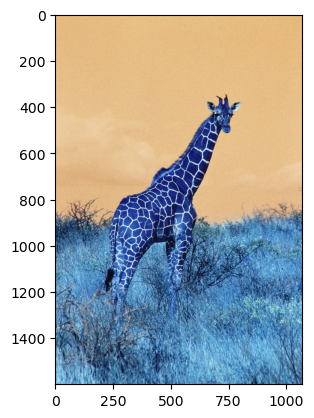

In [50]:
image=cv2.imread("images/giraffe-Kenya.png")
print(image)

plt.imshow(image)

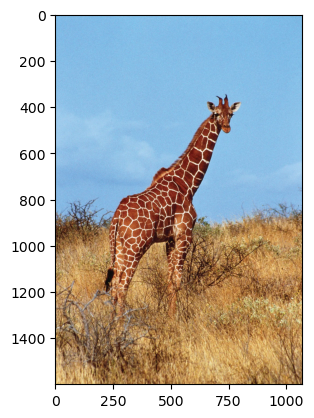

In [51]:
img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)

In [52]:
rows,cols,_=img_rgb.shape

input_point=np.float32([[50,50],[cols-50,50],[50,rows-50],[cols-50,rows-50]])

output_point=np.float32([[10,100],[cols-100,50],[100,rows-10],[cols-50,rows-100]])


'''
Transformation Matrix for Prespective Transformation  

3*3 
a,b,c
d,e,f
g,h,1 

a,b,c --> Horisental scaling ,rotation and translation 
d,e,f --> Vertical scaling ,rotation and translation 
g,h  ---> Prespective components that account for depth and skew 
'''

M=cv2.getPerspectiveTransform(input_point,output_point)

print(M)

[[ 1.02287821e+00  6.29847356e-02 -4.42634568e+01]
 [-5.02940991e-02  1.04090741e+00  5.07662367e+01]
 [ 3.13145264e-05  2.80659423e-05  1.00000000e+00]]


(-0.5, 1066.5, 1599.5, -0.5)

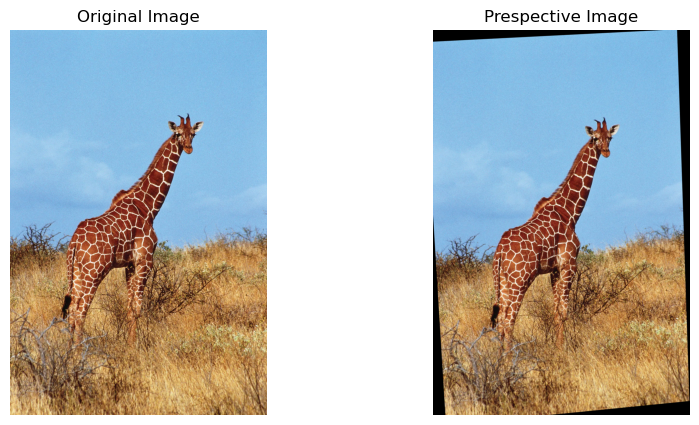

In [53]:
prespective_image=cv2.warpPerspective(img_rgb,M,(cols,rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(prespective_image)
plt.title("Prespective Image")
plt.axis("off")

## Affine transformation 

(-0.5, 1066.5, 1599.5, -0.5)

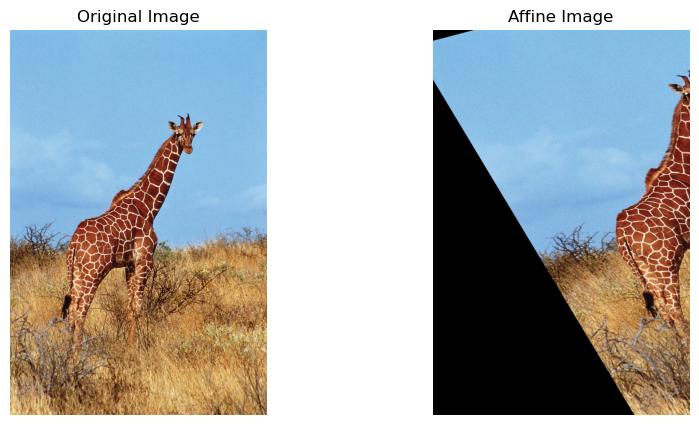

In [54]:
input_points=np.float32([[50,50],[200,50],[50,200]])
output_points=np.float32([[10,100],[200,50],[100,250]]) 


M=cv2.getAffineTransform(input_points,output_points)

Affine_image=cv2.warpAffine(img_rgb,M,(cols,rows))



plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(Affine_image)
plt.title("Affine Image")
plt.axis("off")

## Rotation 

(-0.5, 1066.5, 1599.5, -0.5)

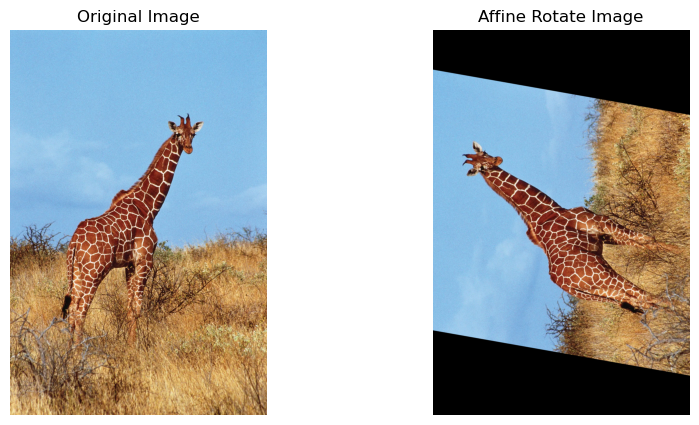

In [55]:
angle=80 
center=(cols//2,rows//2)
scale=1.0 

M=cv2.getRotationMatrix2D(center , angle,scale)
Rotated_image=cv2.warpAffine(img_rgb,M,(cols,rows))



plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(Rotated_image)
plt.title("Affine Rotate Image")
plt.axis("off")


## Shared Image

(-0.5, 1866.5, 1599.5, -0.5)

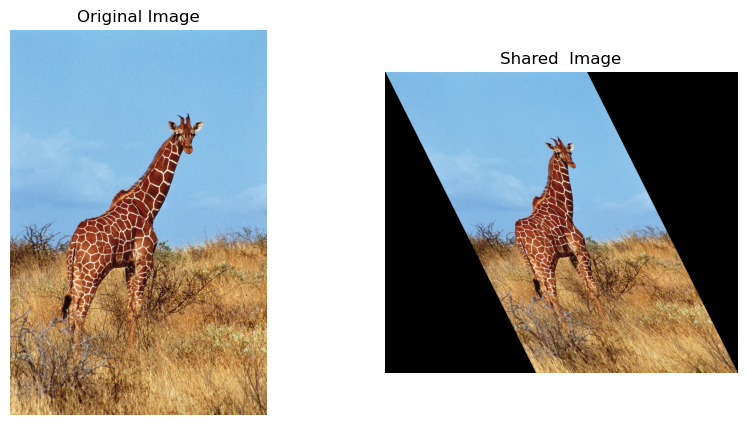

In [56]:
share_x,share_y=0.5,0



M=np.float32([[1,share_x,0],[share_y,1,0]])

Shared_image=cv2.warpAffine(img_rgb,M,(cols+int(share_x *rows),rows)) 


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(Shared_image)
plt.title("Shared  Image")
plt.axis("off")


## Translation 

(-0.5, 1066.5, 1599.5, -0.5)

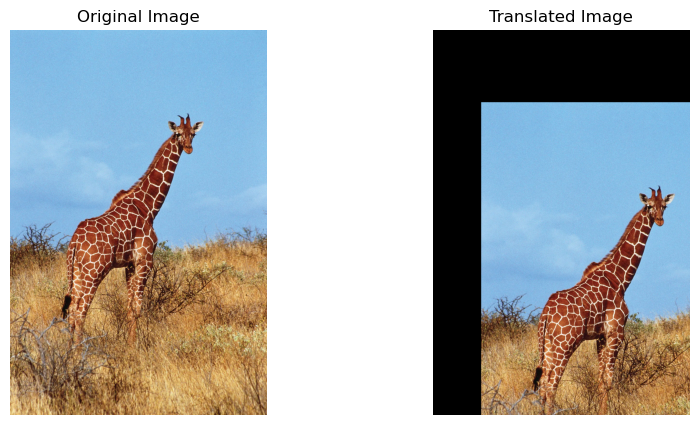

In [58]:
tx,ty=200,300



M=np.float32([[1,0,tx],[0,1,ty]])

Translated_image=cv2.warpAffine(img_rgb,M,(cols,rows)) 


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(Translated_image)
plt.title("Translated Image")
plt.axis("off")
